# Calcolo della Distribuzione a Posteriori Gaussiana tramite Metodo a Griglia {#sec-grid-gauss}

**Prerequisiti**

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import arviz as az

In [3]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")

## Introduzione {.unnumbered}

In questo capitolo, estenderemo la discussione precedente sul calcolo della distribuzione a posteriori utilizzando il metodo basato su griglia, applicandolo questa volta a un caso con verosimiglianza gaussiana. In particolare, ci concentreremo su come costruire un modello gaussiano per descrivere l'intelligenza.

Immaginiamo di condurre uno studio sulla plusdotazione, considerando l'approccio psicometrico. Secondo questo approccio, una persona è considerata plusdotata se ha un QI (Quoziente Intellettivo) di 130 o superiore (Robinson, Zigler, & Gallagher, 2000). Anche se l'uso di un QI di 130 come soglia è il criterio più comune, non è universalmente accettato. L'intelligenza nei bambini plusdotati non è solo superiore rispetto a quella dei loro pari, ma è qualitativamente diversa (Lubart & Zenasni, 2010). I bambini plusdotati tendono a mostrare caratteristiche come un vocabolario ampio, un linguaggio molto sviluppato, processi di ragionamento avanzati, eccellente memoria, vasti interessi, forte curiosità, empatia, capacità di leadership, abilità visive elevate, impegno in situazioni sfidanti e un forte senso di giustizia (Song & Porath, 2005).

Nella simulazione che seguirà, assumeremo che i dati provengano da una distribuzione normale. Per semplicità, considereremo che la deviazione standard sia nota e pari a 5. Il parametro della media sarà l'oggetto della nostra inferenza.

## Dati

Supponiamo di avere un campione di 10 osservazioni. I dati saranno generati casualmente da una distribuzione normale con media 130 e deviazione standard 5. Utilizziamo il seguente codice Python per generare questi dati:

In [15]:
np.random.seed(RANDOM_SEED)  # Per la riproducibilità
vera_media = 130  # Media vera
sigma_conosciuta = 5  # Deviazione standard conosciuta
dimensione_campione = 10  # Dimensione del campione

# Generare un campione
campione = np.random.normal(loc=vera_media, scale=sigma_conosciuta, size=dimensione_campione).round()
print(campione)

[129. 124. 135. 141. 128. 123. 141. 119. 132. 131.]


## Griglia

Creiamo ora una griglia di 100 valori compresi tra 110 e 150. Questa griglia ci servirà per calcolare la verosimiglianza.

In [17]:
mu_griglia = np.linspace(start=110, stop=150, num=100)  # 100 punti tra 110 e 150
print(mu_griglia)

[110.         110.4040404  110.80808081 111.21212121 111.61616162
 112.02020202 112.42424242 112.82828283 113.23232323 113.63636364
 114.04040404 114.44444444 114.84848485 115.25252525 115.65656566
 116.06060606 116.46464646 116.86868687 117.27272727 117.67676768
 118.08080808 118.48484848 118.88888889 119.29292929 119.6969697
 120.1010101  120.50505051 120.90909091 121.31313131 121.71717172
 122.12121212 122.52525253 122.92929293 123.33333333 123.73737374
 124.14141414 124.54545455 124.94949495 125.35353535 125.75757576
 126.16161616 126.56565657 126.96969697 127.37373737 127.77777778
 128.18181818 128.58585859 128.98989899 129.39393939 129.7979798
 130.2020202  130.60606061 131.01010101 131.41414141 131.81818182
 132.22222222 132.62626263 133.03030303 133.43434343 133.83838384
 134.24242424 134.64646465 135.05050505 135.45454545 135.85858586
 136.26262626 136.66666667 137.07070707 137.47474747 137.87878788
 138.28282828 138.68686869 139.09090909 139.49494949 139.8989899
 140.3030303 

### Calcolo della Verosimiglianza

Per ogni valore di media nella griglia, calcoleremo la verosimiglianza, che rappresenta la probabilità di osservare il nostro campione dati quei valori di media. Poiché le osservazioni nel campione sono indipendenti, la verosimiglianza complessiva è il prodotto delle densità di probabilità di ciascuna osservazione:

In [18]:
likelihood = np.array(
    [np.prod(stats.norm.pdf(campione, loc=mu, scale=sigma_conosciuta)) for mu in mu_griglia]
)
likelihood

array([1.09207034e-51, 2.81130431e-50, 6.77962875e-49, 1.53159793e-47,
       3.24133885e-46, 6.42606189e-45, 1.19345536e-43, 2.07638679e-42,
       3.38416198e-41, 5.16695682e-40, 7.39025335e-39, 9.90203887e-38,
       1.24288439e-36, 1.46142874e-35, 1.60977567e-34, 1.66109274e-33,
       1.60569555e-32, 1.45402990e-31, 1.23345773e-30, 9.80202970e-30,
       7.29707081e-29, 5.08887652e-28, 3.32457450e-27, 2.03465618e-26,
       1.16650552e-25, 6.26503313e-25, 3.15210554e-24, 1.48565830e-23,
       6.55960851e-23, 2.71317442e-22, 1.05127978e-21, 3.81592400e-21,
       1.29754350e-20, 4.13318590e-20, 1.23335687e-19, 3.44773107e-19,
       9.02856674e-19, 2.21485371e-18, 5.08993326e-18, 1.09577133e-17,
       2.20987945e-17, 4.17501498e-17, 7.38904479e-17, 1.22506566e-16,
       1.90270402e-16, 2.76836859e-16, 3.77326575e-16, 4.81783232e-16,
       5.76271010e-16, 6.45717667e-16, 6.77796577e-16, 6.66494974e-16,
       6.13953092e-16, 5.29802873e-16, 4.28286349e-16, 3.24335853e-16,
      

Questo codice svolge le seguenti operazioni:

- *Calcolo della PDF:* Per ogni valore di media nella griglia, stats.norm.pdf(campione, loc=mu, scale=sigma_conosciuta) calcola la densità di probabilità (PDF) per ogni osservazione del campione. Questo ci indica quanto sia probabile osservare quel campione, dato un certo valore di media.
- *Moltiplicazione delle Probabilità:* `np.prod()` moltiplica tutte queste densità di probabilità, ottenendo così la verosimiglianza complessiva per quel particolare valore della media. Questo passo è essenziale perché stiamo assumendo che le osservazioni siano indipendenti.
- *Iterazione su Tutti i Valori della Griglia:* Il calcolo viene ripetuto per ciascun valore della media nella griglia, restituendo un array (likelihood) che contiene la verosimiglianza per ogni valore di media.

Ad esempio, per il primo valore della griglia, 110, il codice calcola quanto sia probabile osservare il campione, assumendo che la media sia effettivamente 110.

### Calcolo della Distribuzione a Posteriori

Dopo aver calcolato la verosimiglianza per ciascun valore della media, possiamo costruire la distribuzione a posteriori, che combina le informazioni provenienti dai dati con la conoscenza a priori.

- *Impostazione della Prior:* In questo esempio, usiamo una prior uniforme, cioè assumiamo che tutti i valori di media siano inizialmente equiprobabili.
- *Calcolo della Posteriori Non Normalizzata:* Moltiplichiamo la verosimiglianza per la prior per ottenere la distribuzione a posteriori non normalizzata.
- *Normalizzazione della Posteriori:* Normalizziamo la distribuzione a posteriori dividendo ciascun valore per la somma totale degli elementi, ottenendo una distribuzione di probabilità valida.

Ecco come appare il codice:

In [19]:
prior = np.ones(len(mu_griglia))  # Una prior uniforme
posterior_non_norm = likelihood * prior  # Calcoliamo la posterior non normalizzata moltiplicando per la prior
posterior = posterior_non_norm / np.sum(posterior_non_norm)  # Normalizziamo la posterior

Questo processo di normalizzazione garantisce che la distribuzione a posteriori sia una distribuzione di probabilità valida, con una somma totale pari a 1.

### Rappresentazione Grafica della Posterior

Possiamo ora visualizzare la distribuzione a posteriori con un semplice grafico:

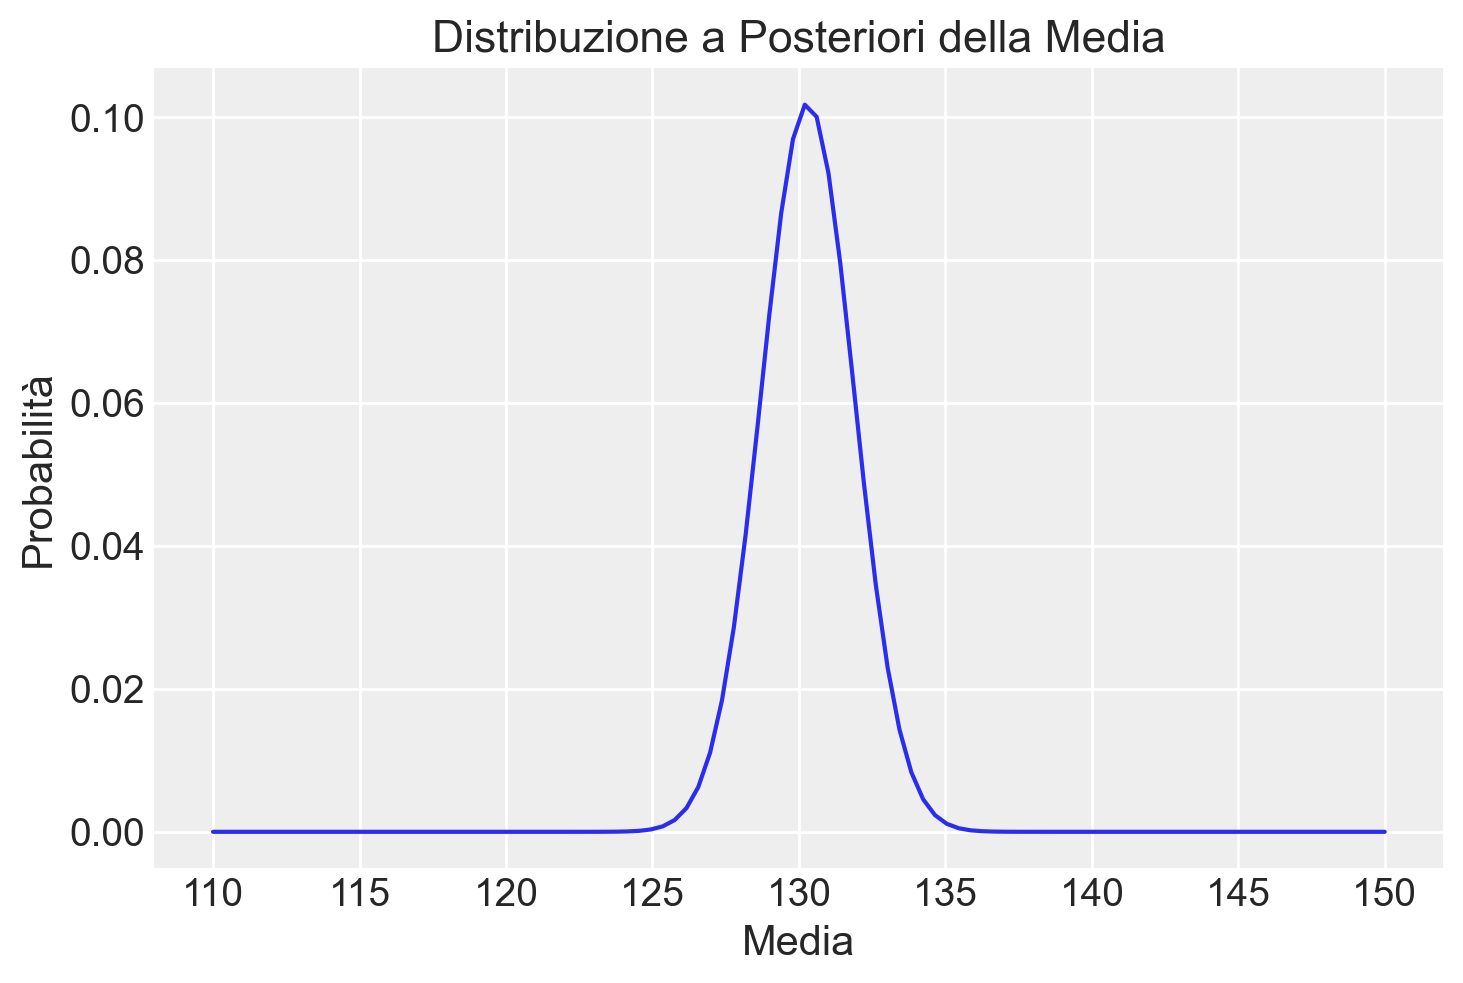

In [20]:
plt.plot(mu_griglia, posterior)
plt.title('Distribuzione a Posteriori della Media')
plt.xlabel('Media')
plt.ylabel('Probabilità')
plt.show()

Per esplorare ulteriormente, consideriamo una prior non uniforme, come una distribuzione gaussiana con media 140 e deviazione standard 3:

In [21]:
# Calcolo della prior gaussiana per ogni valore della griglia della media
prior = stats.norm.pdf(mu_griglia, loc=140, scale=3)

# Calcolo della likelihood (rimane invariato)
likelihood = np.array([np.prod(stats.norm.pdf(campione, loc=mu, scale=sigma_conosciuta)) for mu in mu_griglia])

# Calcolo della distribuzione a posteriori (aggiornamento con la nuova prior)
posterior_non_norm = likelihood * prior  # Moltiplicazione element-wise
posterior = posterior_non_norm / np.sum(posterior_non_norm)  # Normalizzazione

Possiamo confrontare la nuova distribuzione a posteriori con la prior originale:

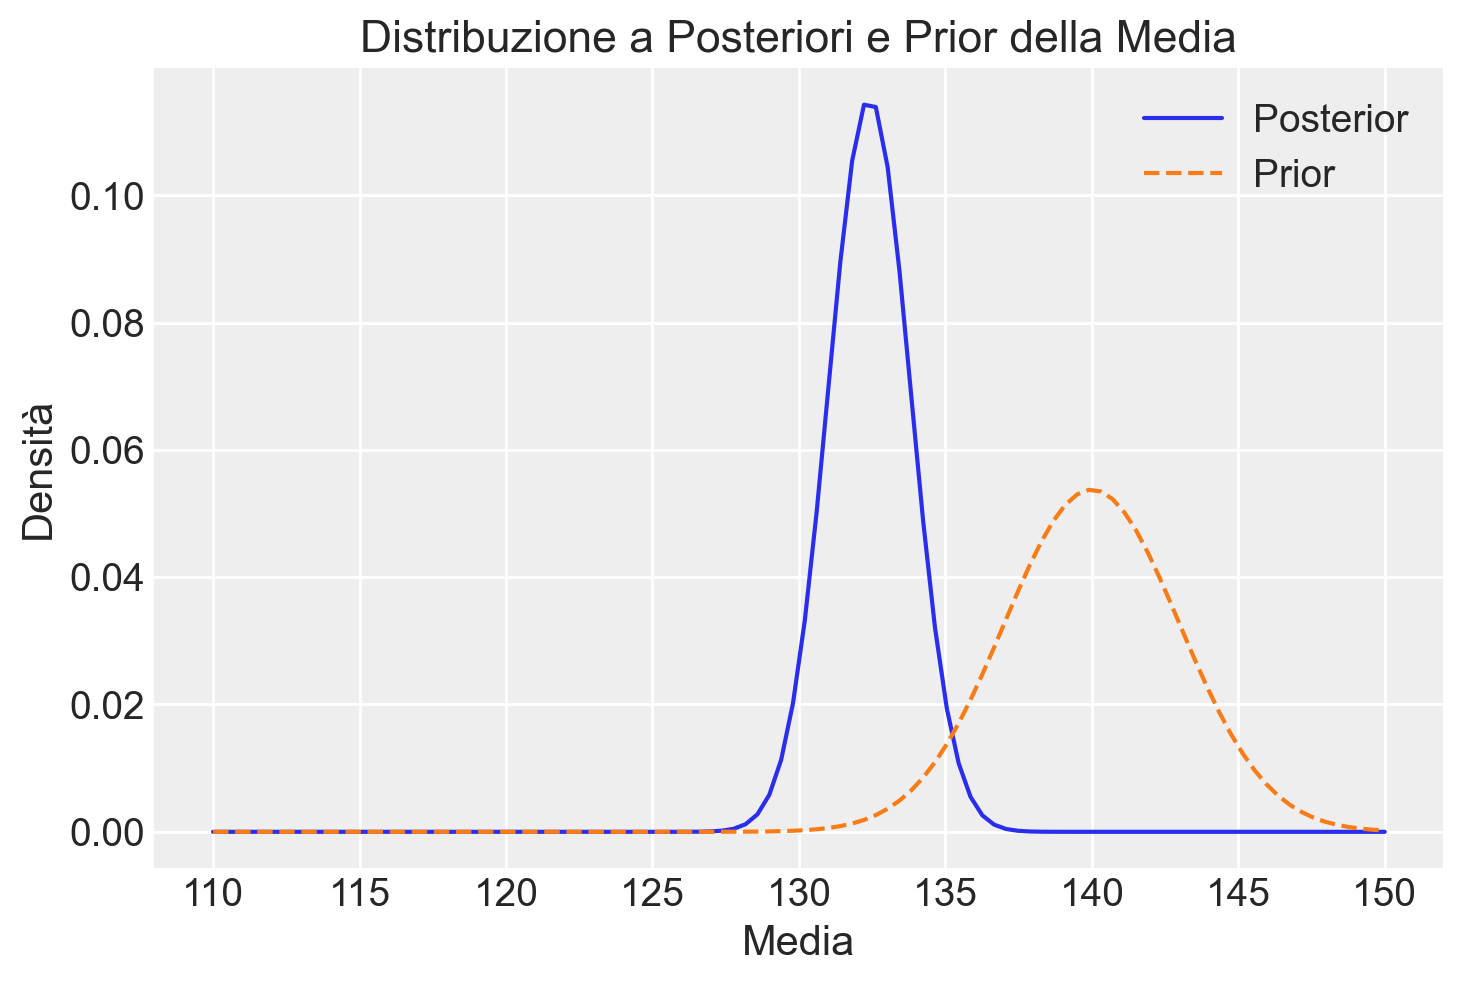

In [22]:
plt.plot(mu_griglia, posterior, label='Posterior')
plt.plot(mu_griglia, prior / np.sum(prior), label='Prior', linestyle='--')
plt.title('Distribuzione a Posteriori e Prior della Media')
plt.xlabel('Media')
plt.ylabel('Densità')
plt.legend()
plt.show()

Si osserva che, con un campione di piccole dimensioni, l'utilizzo di una prior informativa ha influenzato considerevolmente la distribuzione a posteriori, spostandola verso la prior. Questo effetto è evidente se confrontiamo la posterior ottenuta con la prior informativa rispetto a quella ottenuta con una prior uniforme.

### Campionamento dalla Posterior

Per ottenere un campione dalla distribuzione a posteriori, possiamo utilizzare il campionamento ponderato:

In [23]:
# Selezione casuale di un indice dalla griglia secondo le probabilità a posteriori
indice_campionato = np.random.choice(a=len(mu_griglia), size=1000, p=posterior)

# Estrazione del valore della media corrispondente all'indice campionato
media_campionata = mu_griglia[indice_campionato]
media_campionata.shape

(1000,)

Il metodo `np.random.choice` permette di selezionare un indice dalla griglia con probabilità proporzionale ai valori della distribuzione a posteriori. In questo modo, i valori della media con probabilità a posteriori più alta saranno selezionati più frequentemente, riflettendo la loro maggiore plausibilità data la combinazione dei dati osservati e della prior.

Questo campione dalla distribuzione a posteriori rappresenta quindi una possibile stima della media della popolazione, tenendo conto sia dei dati osservati (attraverso la likelihood) sia delle nostre conoscenze o supposizioni precedenti (attraverso la prior).

Questo campionamento riflette la plausibilità di ciascun valore della media, basandosi sui dati e sulla prior. L'istogramma risultante mostra la distribuzione dei campioni:

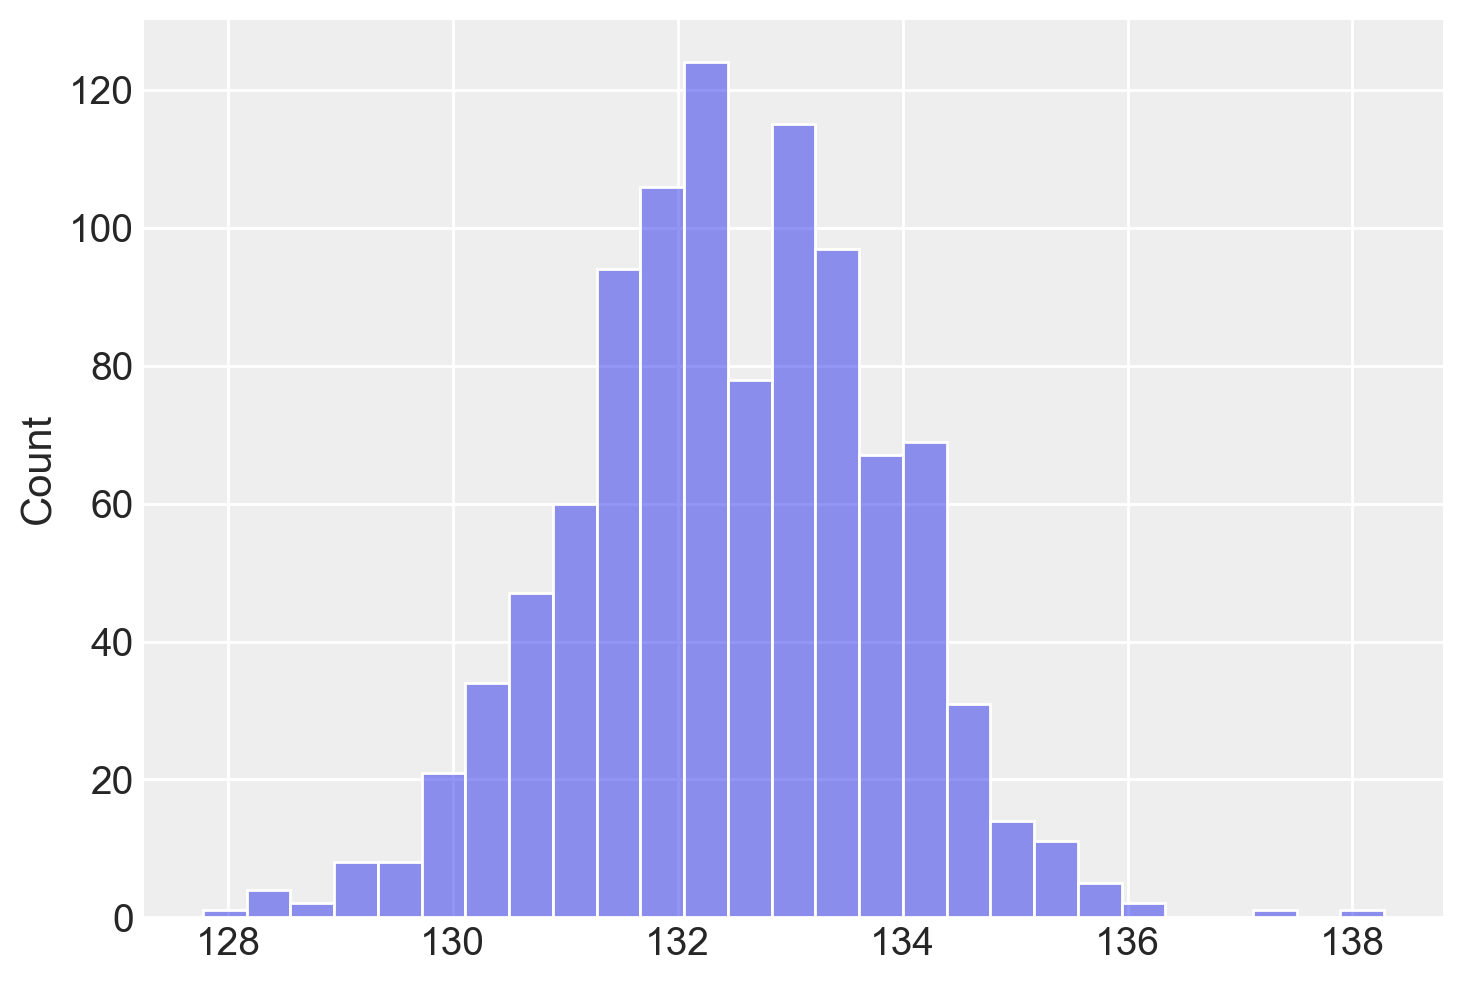

In [38]:
_ = sns.histplot(media_campionata, alpha=0.5)

Calcoliamo ora la media a posteriori:

In [25]:
np.mean(media_campionata)

132.4363636363636

Per calcolare l'intervallo di credibilità al 94%, possiamo fare così:

In [26]:
# Calcolo del 3° e 97° percentile dei campioni per ottenere l'intervallo di credibilità al 95%
limite_inferiore = np.percentile(media_campionata, 3)
limite_superiore = np.percentile(media_campionata, 97)

print(f"Intervallo di credibilità al 94% per la media: [{limite_inferiore}, {limite_superiore}]")

Intervallo di credibilità al 94% per la media: [129.7979797979798, 135.05050505050505]


L'intervallo di credibilità offre una stima probabilistica di dove si trova il vero valore della media, riflettendo l'incertezza della nostra stima basata sui dati e sulle conoscenze precedenti.

## La Log-Verosimiglianza

Nel calcolo della verosimiglianza, abbiamo visto che lavorare con la somma delle probabilità può causare problemi (ovvero, produrre valori numerici estremamente piccoli). Per risolvere questi problemi, è meglio usare i logaritmi.

1. **Stabilità Numerica**: Quando moltiplichiamo molte probabilità piccole, il risultato può essere così piccolo che il computer lo arrotonda a zero, causando errori. Usare i logaritmi trasforma le moltiplicazioni in somme, riducendo questo rischio.

2. **Semplificazione dei Calcoli**: Il logaritmo di un prodotto è uguale alla somma dei logaritmi (log(ab) = log(a) + log(b)). Questo ci permette di trasformare un prodotto complesso in una somma, rendendo i calcoli più semplici e veloci.

3. **Miglioramento della Precisione**: I calcolatori sono generalmente più precisi nel sommare numeri che nel moltiplicarli, specialmente quando si tratta di numeri molto grandi o molto piccoli. Usare i logaritmi aiuta quindi a mantenere una maggiore precisione nei nostri calcoli.

4. **Facilità di Ottimizzazione**: Molti algoritmi di ottimizzazione funzionano meglio con somme piuttosto che con prodotti. Questo è particolarmente utile quando dobbiamo stimare parametri, come la media, in modo più efficiente.

5. **Gestione di Valori Estremi**: I logaritmi aiutano a gestire meglio un'ampia gamma di valori, riducendo l'impatto di numeri estremamente grandi o piccoli che potrebbero influenzare negativamente i risultati.

In conclusione, usare i logaritmi nei calcoli probabilistici è vantaggioso perché migliora la stabilità, la precisione e l'efficienza, rendendolo un metodo preferibile in molte situazioni.

**Esempio con Log-Verosimiglianza**

Per applicare questo concetto, riprendiamo l'esempio precedente e rifacciamo i calcoli usando i logaritmi. Questo ci aiuterà a evitare problemi di precisione e a semplificare i calcoli. Seguiamo i passaggi uno per uno:

1. **Generazione del Campione**: Generiamo un campione di dati da una distribuzione normale.
2. **Definizione della Griglia**: Creiamo una serie di possibili valori per la media.
3. **Calcolo della Log-Verosimiglianza**: Calcoliamo la log-verosimiglianza per ciascun valore della media.
4. **Calcolo della Log-Posterior**: Combiniamo la log-verosimiglianza con la log-prior (se applicabile) e normalizziamo i risultati per ottenere la distribuzione a posteriori.
5. **Visualizzazione**: Mostriamo graficamente la distribuzione a posteriori.

Ecco come fare in Python:

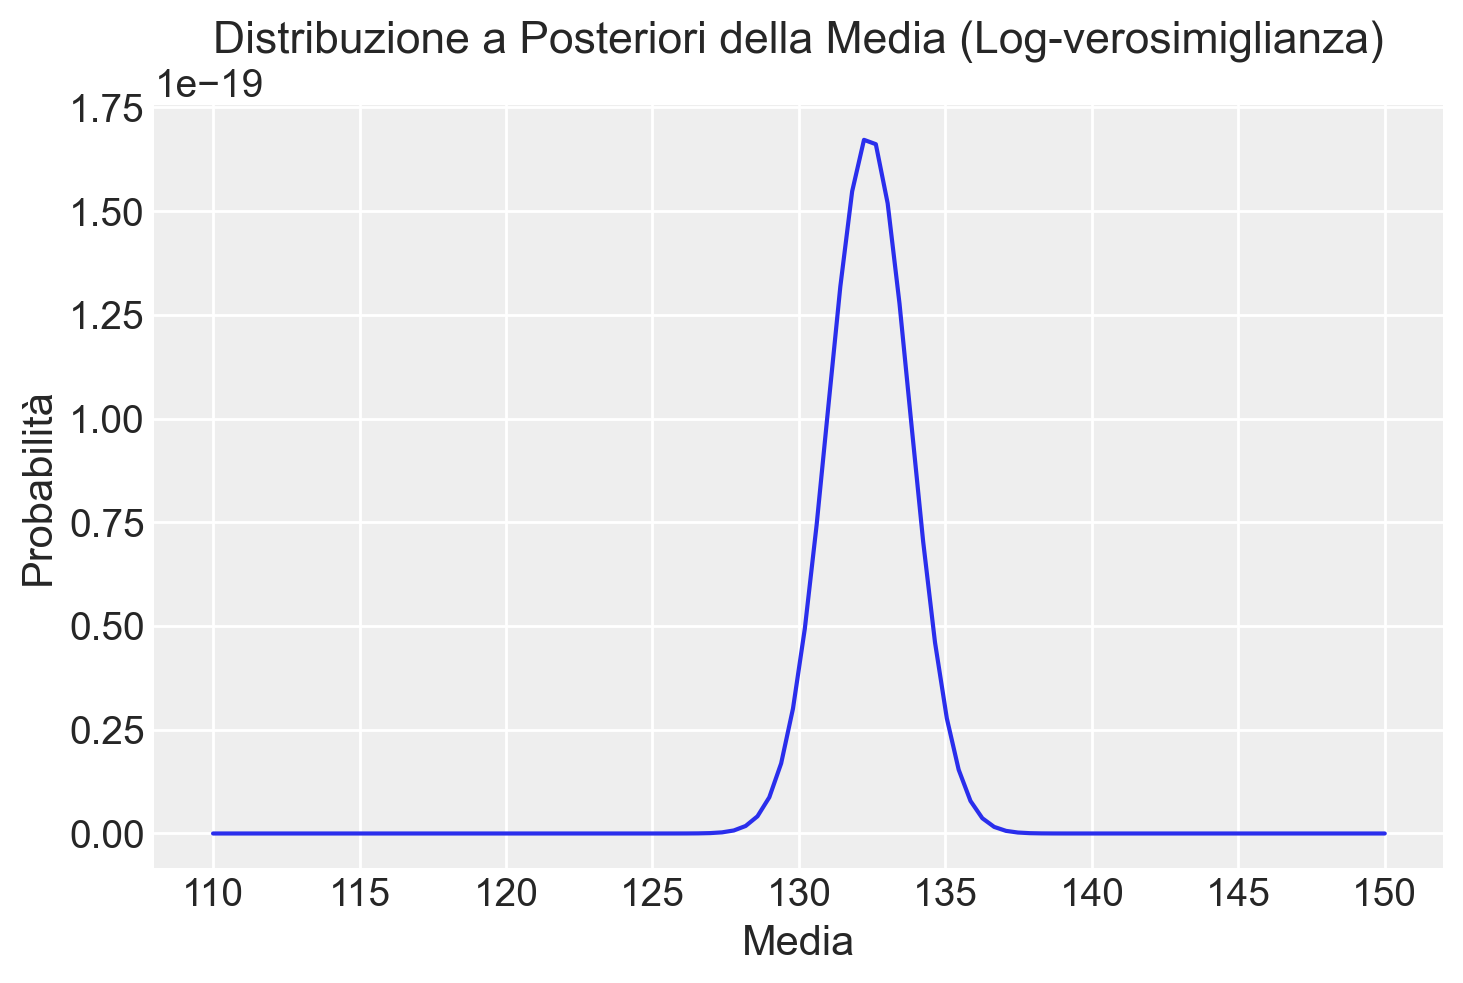

In [39]:
# Per la riproducibilità dei risultati
np.random.seed(RANDOM_SEED)

# Parametri veri e conosciuti
vera_media = 130
sigma_conosciuta = 5
dimensione_campione = 10

# Generazione di un campione casuale dalla distribuzione normale
campione = np.random.normal(
    loc=vera_media, scale=sigma_conosciuta, size=dimensione_campione
)

# Definizione della griglia per la media
mu_griglia = np.linspace(start=110, stop=150, num=100)

# Calcolo della log-verosimiglianza per ciascun valore nella griglia
log_likelihood = np.array(
    [
        np.sum(stats.norm.logpdf(campione, loc=mu, scale=sigma_conosciuta))
        for mu in mu_griglia
    ]
)

# Calcolo della log-prior gaussiana centrata su 140 con deviazione standard 3
log_prior = stats.norm.logpdf(mu_griglia, loc=140, scale=3)

# Calcolo della log-posterior non normalizzata
log_posterior_non_norm = log_likelihood + log_prior

# Normalizzazione della log-posterior (conversione alla scala lineare)
log_posterior = log_posterior_non_norm - np.log(
    np.sum(np.exp(log_posterior_non_norm - np.max(log_posterior_non_norm)))
)
posterior = np.exp(log_posterior)

# Visualizzazione della distribuzione a posteriori
plt.plot(mu_griglia, posterior)
plt.title("Distribuzione a Posteriori della Media (Log-verosimiglianza)")
plt.xlabel("Media")
plt.ylabel("Probabilità")
plt.show()

Questo codice ci permette di calcolare e visualizzare la distribuzione a posteriori in modo più sicuro ed efficiente, utilizzando i logaritmi per gestire meglio i calcoli complessi.

## Deviazione Standard Ignota

Estendere l'approccio usato sopra al caso in cui la deviazione standard ($\sigma$) della popolazione non è conosciuta introduce una complessità maggiore nell'inferenza bayesiana, poiché ora dobbiamo stimare due parametri (la media e la deviazione standard) invece di uno solo. In questo contesto, la distribuzione a posteriori diventa una funzione delle due dimensioni (media e $\sigma$), e la sua esplorazione richiede metodi più sofisticati per navigare efficacemente lo spazio dei parametri. Vediamo come affrontare questo problema:

### 1. **Definizione dello Spazio dei Parametri**

Dobbiamo definire una griglia bidimensionale che copra le possibili combinazioni di valori per la media ($\mu$) e la deviazione standard ($\sigma$). Questo approccio, sebbene computazionalmente intensivo, è fattibile per problemi di dimensioni moderate.

In [30]:
mu_griglia = np.linspace(start=110, stop=150, num=100)
sigma_griglia = np.linspace(start=1, stop=10, num=50)

### 2. **Calcolo della Log-Likelihood Bidimensionale**

Per ogni coppia di valori ($\mu$, $\sigma$) nella griglia, calcoliamo la log-likelihood del campione. Questo richiede un'iterazione su entrambe le dimensioni della griglia.

In [31]:
log_likelihood_2d = np.array([[np.sum(stats.norm.logpdf(campione, loc=mu, scale=sigma))
                                for sigma in sigma_griglia] for mu in mu_griglia])

### 3. **Applicazione delle Priors**

Le priors per $\mu$ e $\sigma$ possono essere definite in modo indipendente e poi combinate, o si può definire una prior congiunta che rifletta la conoscenza o le assunzioni sui parametri. Le log-priors per $\mu$ e $\sigma$ sono calcolate su ogni griglia rispettivamente e poi sommate per ottenere una log-prior congiunta.

In [32]:
log_prior_mu = stats.norm.logpdf(mu_griglia, loc=140, scale=5)
log_prior_sigma = stats.norm.logpdf(sigma_griglia, loc=5, scale=2)
log_prior_2d = log_prior_mu[:, np.newaxis] + log_prior_sigma

### 4. **Calcolo della Distribuzione a Posterior Bidimensionale**

Sommando la log-likelihood con la log-prior congiunta e normalizzando, otteniamo la distribuzione a posteriori bidimensionale.

In [33]:
log_posterior_2d = log_likelihood_2d + log_prior_2d
log_posterior_2d -= np.max(log_posterior_2d)  # Stabilizzazione
posterior_2d = np.exp(log_posterior_2d)
posterior_2d /= np.sum(posterior_2d)

### 5. **Visualizzazione**

La visualizzazione di distribuzioni bidimensionali può essere effettuata tramite contour plot o heatmaps.


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_63985/4162669767.py:2: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Media ($\mu$)')
/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_63985/4162669767.py:3: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('Deviazione Standard ($\sigma$)')


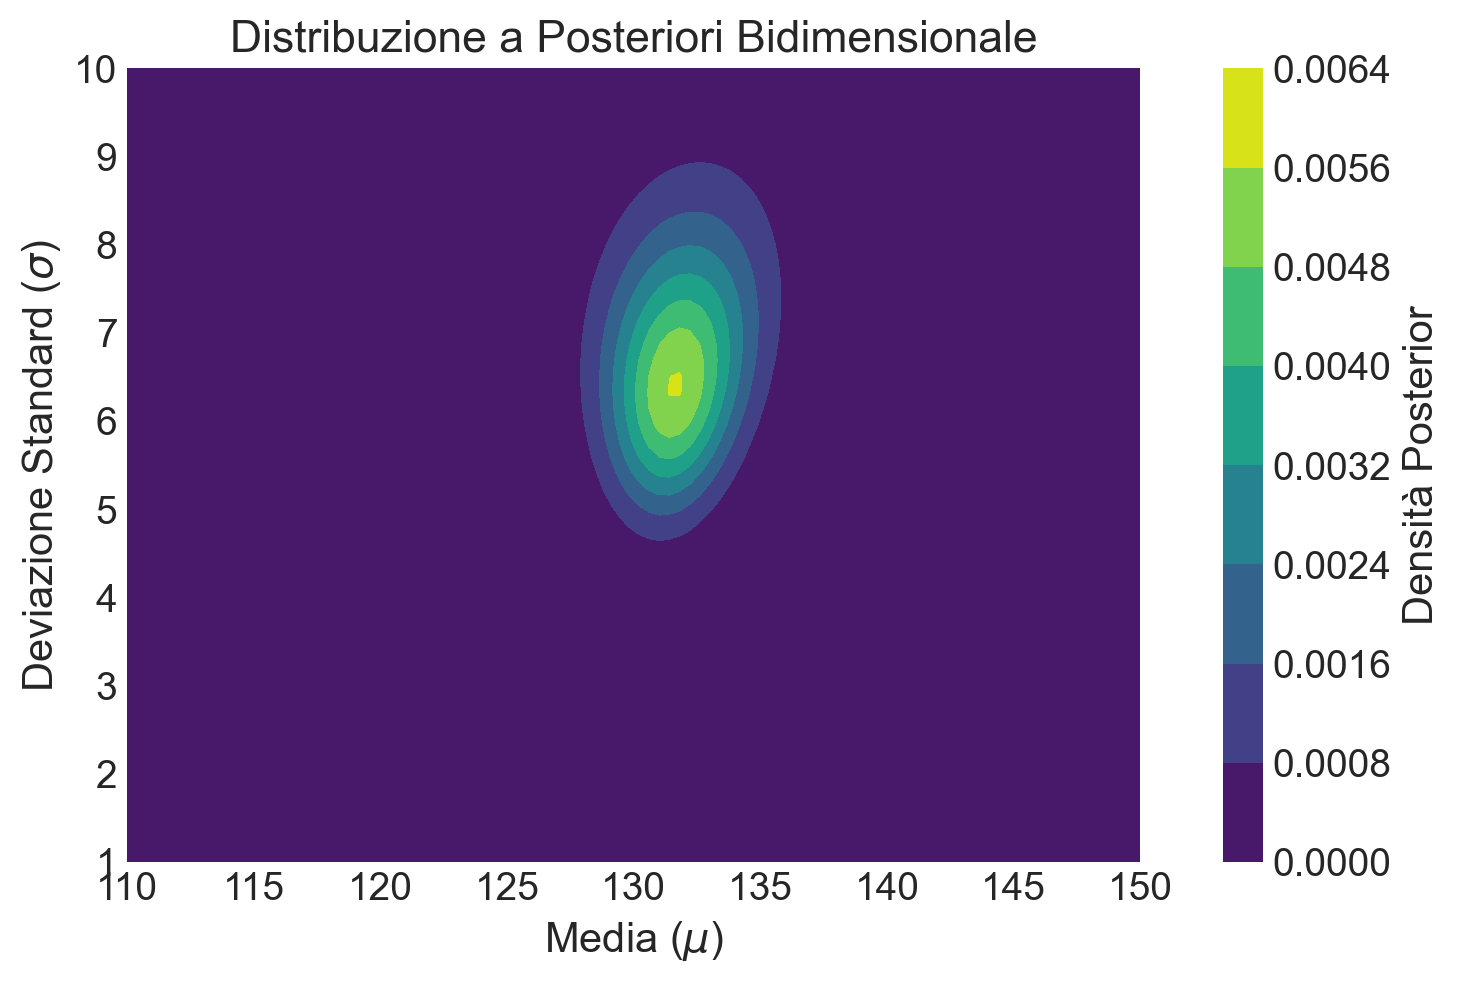

In [36]:
plt.contourf(mu_griglia, sigma_griglia, posterior_2d.T)
plt.xlabel('Media ($\mu$)')
plt.ylabel('Deviazione Standard ($\sigma$)')
plt.colorbar(label='Densità Posterior')
plt.title('Distribuzione a Posteriori Bidimensionale')
plt.show()

## Riflessioni Conclusive

Quando si passa alla stima simultanea di più parametri, come la media ($\mu$) e la deviazione standard ($\sigma$), l'analisi diventa notevolmente più complessa. Questo perché occorre considerare un numero molto maggiore di combinazioni di parametri rispetto alla stima di un solo parametro, aumentando così il carico computazionale. Inoltre, la scelta delle priors per ciascun parametro richiede particolare attenzione, poiché queste influenzeranno in modo diretto le stime a posteriori.

In scenari dove lo spazio dei parametri è multidimensionale o quando l'esplorazione della griglia diventa impraticabile, l'uso di metodi avanzati come il campionamento di Markov Chain Monte Carlo (MCMC) diventa indispensabile. Questi metodi permettono di campionare in modo efficiente dalla distribuzione a posteriori, senza la necessità di esplorare esplicitamente ogni combinazione possibile di parametri, rendendo l'analisi più gestibile anche in contesti complessi.

In conclusione, l'estensione dell'approccio bayesiano a problemi con più parametri sconosciuti richiede un'attenzione ancora maggiore nella definizione dello spazio dei parametri, nella selezione delle priors appropriate e nel calcolo delle distribuzioni a posteriori. L'adozione di tecniche come l'MCMC può facilitare questo processo, permettendo di affrontare in modo efficiente problemi che altrimenti sarebbero proibitivi dal punto di vista computazionale.

## Informazioni sull'Ambiente di Sviluppo {.unnumbered}

In [30]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Wed Mar 20 2024

Python implementation: CPython
Python version       : 3.11.8
IPython version      : 8.22.2

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

arviz     : 0.17.1
seaborn   : 0.13.2
scipy     : 1.12.0
pandas    : 2.2.1
matplotlib: 3.8.3
numpy     : 1.26.4

Watermark: 2.4.3

